## Homework 1 ##

In [9]:
import numpy as np
from scipy.integrate import solve_ivp, odeint
import matplotlib.pyplot as plt


# Exercise 1 #

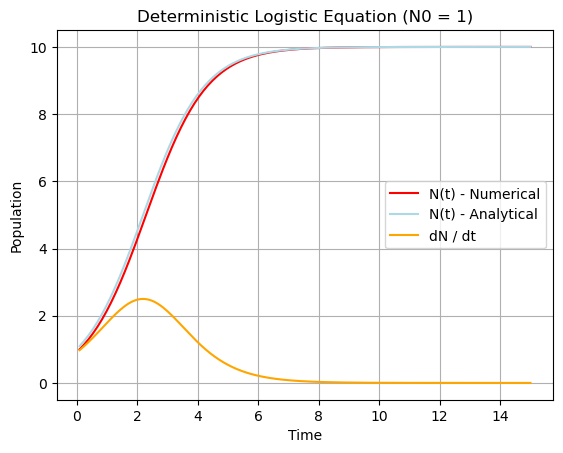

In [48]:
mu = 1
k = 10
N = 1

# ODE
def eq(N,t):
    dndt = mu * N * (1 - (N / k))
    return dndt

# Analytical solution
def et(t):
    return (N * np.exp(mu * t)) / (1 + (N / k) * (np.exp(mu * t) - 1))

# Set the time span 
t_s = np.linspace(0.1, 15, 201) # in seconds

#Solve
sol = odeint(eq, N, t_s)


# Plot the results
plt.plot(t_s, sol, label='N(t) - Numerical', color='r')
plt.plot(t_s, et(t_s), label='N(t) - Analytical', color='lightblue')
plt.plot(t_s, mu * et(t_s) * (1 - (et(t_s) / k)), label='dN / dt', color='orange')
plt.grid()
plt.title("Deterministic Logistic Equation (N0 = 1)")
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

# Exercise 2 #

Perform the quasi stationary approximation of the consumer resource model with 1 species and 1 resources for the abiotic case (without Monod). Check the analytical result with simulations. If you add Monod, numerically how the solutions change?

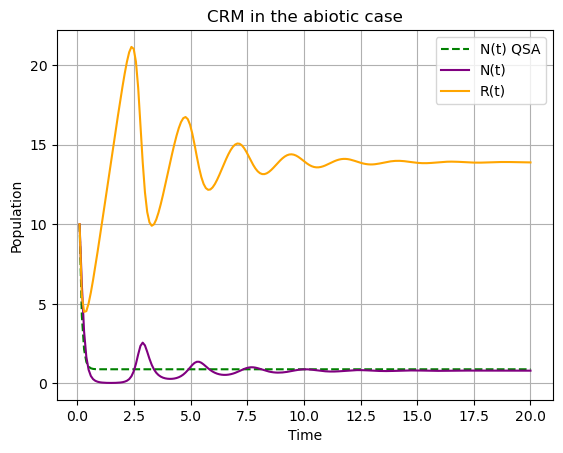

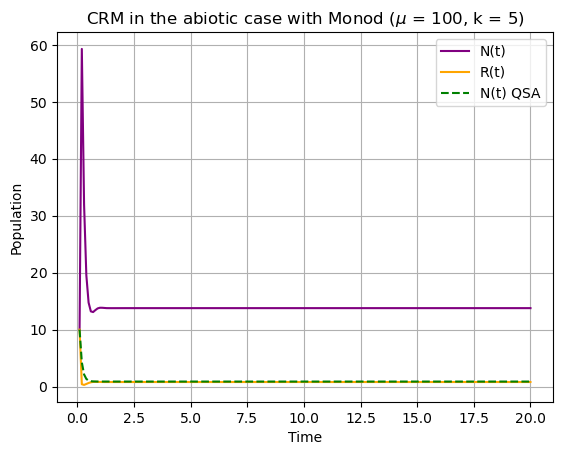

In [58]:
## PARAMETERS
# g: gamma -> yield coeffiient; (0,inf)
# d: death rate; [0,1]
# s: supply rate; (0,inf)
# c: efficiency of the uptake rate; [0,1]
# N0: initial population; [0,inf)

## VARIABLES
# N: population
# t: time

g = 0.8
d = 10
s = 10
c = 0.9

# Z = [N, R]
z = [10,10]
def CRM(z,t):
    dndt = (g * c * z[1] - d) * z[0]
    drdt = s - c * z[1] * z[0]
    return [dndt, drdt]

# Without Monod:
def pop(N,t):
    return (((g * s) / (c * N)) - d) * N

# Set the time span 
t_s = np.linspace(0.1, 20, 201) # in seconds

# Solve
sol_n = odeint(pop,z[0],t_s)
sol_z = odeint(CRM, z, t_s)

# Plot the results
plt.plot(t_s, sol_n, label='N(t) QSA', color='g', linestyle='--')
#plt.plot(t_s, sol_m, label='N(t) w Monod', color='r')
plt.plot(t_s, sol_z[:,0], label="N(t)", color="purple")
plt.plot(t_s, sol_z[:,1], label="R(t)", color="orange")
plt.grid()
plt.title("CRM in the abiotic case")
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

####################### With Monod ########################
mu = 100
K = 5

def monod(z,t):
    m = mu * (z[1] / (K + z[1]))
    dndt = (g * c * m - d) * z[0]
    drdt = s - c * z[1] * z[0]
    return [dndt, drdt]

sol_m = odeint(monod, z, t_s)

plt.plot(t_s, sol_m[:,0], label='N(t)', color='purple')
plt.plot(t_s, sol_m[:,1], label='R(t)', color='orange')
plt.plot(t_s, sol_n, label='N(t) QSA', color='g', linestyle='--')
plt.grid()
plt.title(r"CRM in the abiotic case with Monod ($\mu$ = 100, k = 5)")
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()